<a href="https://colab.research.google.com/github/FacuRoffet99/ML/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Ejercicio 1a / KNN con dataset disperso y k=10

In [3]:
def crear_dataset(media_a_x, ds_a_x, media_a_y, ds_a_y, media_b_x, ds_b_x, media_b_y, ds_b_y, N):
  np.random.seed(1)
  values_a_x = np.random.normal(media_a_x, ds_a_x, N)
  values_a_y = np.random.normal(media_a_y, ds_a_y, N)
  values_b_x = np.random.normal(media_b_x, ds_b_x, N)
  values_b_y = np.random.normal(media_b_y, ds_b_y, N)
  values_x = np.concatenate((values_a_x,values_b_x))[:,np.newaxis]
  values_y = np.concatenate((values_a_y,values_b_y))[:,np.newaxis]

  data = np.concatenate((values_x, values_y), axis=1)
  target = np.array(N*[0]+N*[1])
  target_names = ['A', 'B']

  return data, target, target_names

# Obtengo dataset
N = 100
data, target, target_names = crear_dataset(25, 5, 5, 2, 35, 5, 8, 1, N)

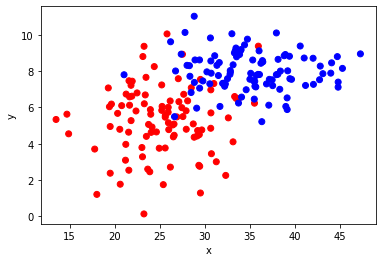

In [4]:
# Grafico dataset
colormap = np.array(['r', 'b'])
plt.scatter(data[:,0], data[:, 1], c=colormap[target])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
# Divido en train y test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=1)

In [6]:
# Entreno con el train set (k=10)
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [7]:
# Métricas train set
y_predicted = knn.predict(X_train)
print(metrics.classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.92      0.98      0.95        48

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [8]:
# Métricas test set
y_predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.87      0.90      0.89        52

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



Si bien las métricas del test set son peores que las del train set (tal como se esperaba), sigue siendo un buen resultado para el caso de k=10.

# Ejercicio 1b / KNN con dataset disperso y k=3

In [9]:
# Entreno con el train set (k=3)
X, y = data, target
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
# Métricas train set
y_predicted = knn.predict(X_train)
print(metrics.classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.92      0.96      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [11]:
# Métricas test set
y_predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        48
           1       0.89      0.94      0.92        52

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



Acá se observa que las métricas del test set para el caso de k=3 son mejores que para k=10

# Ejercicio 1c / KNN con dataset superpuesto y k=3

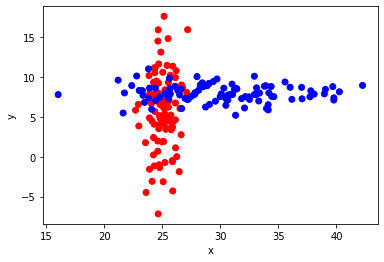

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
# Obtengo dataset
N = 100
data, target, target_names = crear_dataset(25, 1, 5, 5, 30, 5, 8, 1, N)

# Grafico dataset
colormap = np.array(['r', 'b'])
plt.scatter(data[:,0], data[:, 1], c=colormap[target])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Divido en train y test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=1)

# Entreno con el train set (k=3)
X, y = data, target
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [13]:
# Métricas train set
y_predicted = knn.predict(X_train)
print(metrics.classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.96      0.94      0.95        48

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [14]:
# Métricas test set
y_predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.83      0.83      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



Si se utiliza un dataset cuyas clases están más solapadas, las métricas empeoran considerablemente (al menos en el caso de k=3)

# Ejercicio 1d / Caso multidimensional

En el caso de un dataset con más dimensiones, el procedimiento para realizar el análisis es prácticamente el mismo que en el caso bidimensional. Lo único que varía es la forma de computar las distancias entre los puntos.

# Ejercicio 2a / Cross validation

In [15]:
# Obtengo dataset
N = 100
X, y, target_names = crear_dataset(25, 5, 5, 2, 35, 5, 8, 1, N)

# Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

# Entrenamiento
result = cross_val_score(knn, X, y, cv = kf)

# Resultados
print(result)
print(result.mean())

[0.925 0.875 0.9   0.925 0.9  ]
0.905


La accuracy varía entre los folds, aunque la diferencia no es excesiva. Esto indica que no hay un gran overfit en el modelo.

# Ejercicio 2b / Grid search y Cross validation

In [16]:
# Obtengo dataset
N = 100
X, y, target_names = crear_dataset(25, 5, 5, 2, 35, 5, 8, 1, N)

# Parámetros a probar
k = np.linspace(1, 50, dtype = int)

# Modelo
model = neighbors.KNeighborsClassifier()

# Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Grid search con Cross validation
grid = GridSearchCV(estimator = model,
                    param_grid = dict(n_neighbors = k),
                    cv = kf)

# Entrenamiento
grid.fit(X,y)

# Resultados
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 7}
0.9099999999999999


[]

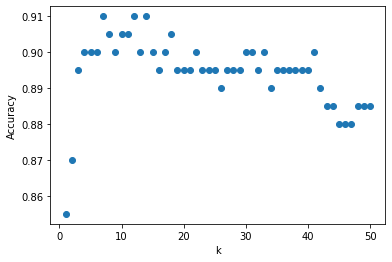

In [17]:
# Gráfico de accuracy
plt.scatter(grid.cv_results_['param_n_neighbors'], grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot()

Los números de vecinos que presentan una mejor accuracy son k={7,12,14}. Del gráfico se observa que el resultado va mejorando al aumentar k hasta que en un determinado punto comienda a empeorar, tal como lo vimos en la teoría. La regla empírica que dice que se debe usar k=sqrt(N) parece ser bastante acertada ya que sqrt(200)=14.14

# Ejercicio 3 / Clasificador de canciones

In [18]:
# Buscar dataset
spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

# Division en datos y etiquetas
X = spotify.drop(['target', 'song_title', 'artist'], axis=1)     # excluyo atributos no numéricos
y = spotify.target

# Parámetros a probar en Grid search
k = np.linspace(1, 50, dtype = int)

# Modelo (KNN)
model = neighbors.KNeighborsClassifier()

# Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Grid search con Cross validation
grid = GridSearchCV(estimator = model,
                    param_grid = dict(n_neighbors = k),
                    cv = kf)

# Entrenamiento
grid.fit(X,y)

# Resultados
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.8978797631624204


[]

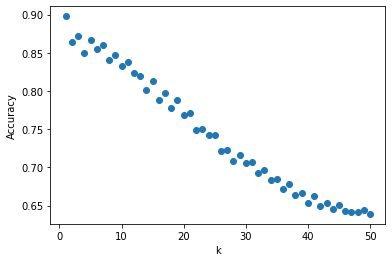

In [19]:
# Gráfico de accuracy
plt.scatter(grid.cv_results_['param_n_neighbors'], grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot()

Parece increíble que un modelo tan simple como KNN pueda lograr una accuracy de casi 90% en un dataset medianamente complejo sin hacer preprocesamiento alguno. Esto demuestra la gran capacidad que tiene el Machine Learning para resolver este tipo de problemas.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Modelo (Random Forest)
model = RandomForestClassifier(random_state=1)

# Entrenamiento
result = cross_val_score(model, X, y, cv = kf)

# Resultados
print(result)
print(result.mean())

[1. 1. 1. 1. 1.]
1.0


Probando con un clasificador más complejo (Random Forest), se obtiene una accuracy perfecta para todos los folds.